In [ ]:
#default_exp exhaustive_training

# 70-exhaustive-training
> Create systematic testing procedure and document conclusions

**Purpose**  The purpose of this notebook is to provide comprehensive testing with respect to:
1. Hyper-parameters (learning rate, dropout rate, compounding, etc)
2. Training data: this includes varying language (Spanish, Portuguese) and record type (baptismal, burial, and marriage)

In [ ]:
#no_test

#data structure imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

#python imports
import random

#modeling imports
from spacy.util import fix_random_seed
from ssda_nlp.collate import *
from ssda_nlp.split_data import *
from ssda_nlp.modeling import *
from ssda_nlp.preprocessing import *
from ssda_nlp.model_performance_utils import *

In [ ]:
#no_test
#if you want the same model everytime:
seed = 2436
random.seed(seed)
fix_random_seed(seed)

# Available Training Data
    1. 15834_annot.jsonl:                Baptism, Cuba
    2. 239746_annot.jsonl:               Baptism, Florida
    3. 419324_annot.jsonl:               Baptism, Colombia
    4. 701075_annot.jsonl:               Baptism, Brazil
    5. deathandbirthdata.jsonl:          ?
    6. guatemala.annotations.jsonl:      ?

In [ ]:
#no_test

collated_df1 = prodigy_output_to_collated_df("transcriptions/15834_annot.jsonl")
collated_df2 = prodigy_output_to_collated_df("transcriptions/239746_annot.jsonl")
collated_df3 = prodigy_output_to_collated_df("transcriptions/419324_annot.jsonl")

collated_df = collated_df1

print(collated_df1.shape)
print(collated_df2.shape)
print(collated_df3.shape)

display(collated_df1.head())
display(collated_df2.head())
display(collated_df3.head())

(2206, 6)
(2839, 6)
(947, 6)


,entry_no,text,entity,start,end,label
0,1,[margin]: Juana. Esc.va Domingo veinte y dos d...,Juana,10,15,PER
1,1,[margin]: Juana. Esc.va Domingo veinte y dos d...,Esc.va,17,23,CHAR
2,1,[margin]: Juana. Esc.va Domingo veinte y dos d...,Domingo veinte y dos de [roto] y nueve,24,62,DATE
3,1,[margin]: Juana. Esc.va Domingo veinte y dos d...,Thomas de Orvera,66,82,PER
4,1,[margin]: Juana. Esc.va Domingo veinte y dos d...,Juana,121,126,PER


,entry_no,text,entity,start,end,label
0,1,"1. María Dolores Sanchez Lunes, día veinte y u...",María Dolores Sanchez,3,24,PER
1,1,"1. María Dolores Sanchez Lunes, día veinte y u...","Lunes, día veinte y uno de Octubre de Mil Sete...",25,94,DATE
2,1,"1. María Dolores Sanchez Lunes, día veinte y u...",Don Miguel o’Reilly,98,117,PER
3,1,"1. María Dolores Sanchez Lunes, día veinte y u...","Teniente de Cura Beneficiado,",118,147,CHAR
4,1,"1. María Dolores Sanchez Lunes, día veinte y u...",Vicario,148,155,CHAR


,entry_no,text,entity,start,end,label
0,1,Partida 8236 En esta Santa Iglecia de Santa Cr...,Santa Iglecia de Santa Cruz de Lorica,21,58,LOCATION
1,1,Partida 8236 En esta Santa Iglecia de Santa Cr...,veinte de Mayo de mil ochocien tos ochenta y c...,61,111,DATE
2,1,Partida 8236 En esta Santa Iglecia de Santa Cr...,José Maria Lugo,129,144,PERSON
3,1,Partida 8236 En esta Santa Iglecia de Santa Cr...,Eva Justina,182,193,PERSON
4,1,Partida 8236 En esta Santa Iglecia de Santa Cr...,cuatro de Febrero,207,224,DATE


In [ ]:
#no_test

collated_df = prodigy_output_to_collated_df("transcriptions/15834_annot.jsonl")
# Split data
train_df, valid_df, test_df = split_data_grp(collated_df, prop_train = 0.7, prop_validation = 0.2, grp_var = 'entry_no', seed=seed)
# Generate Spacy datasets
train_spacy = genSpaCyInput(train_df)
# Look at column names
train_df.head(10)

,entry_no,text,entity,start,end,label
13,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Paula,10,15,PER
14,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Esc.a,17,22,CHAR
15,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Juebes veinte y tres de feb.o de mil sietec.to...,23,86,DATE
16,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Thomas de Orvera,90,106,PER
17,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Paula,145,150,PER
18,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,h. l.16,151,158,CHAR
19,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Juan Joseph,162,173,PER
20,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Maria Josepha,177,190,PER
21,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,esc.s,191,196,CHAR
22,2,[margin]: Paula. Esc.a Juebes veinte y tres de...,Capitan D. Luis Hurtado de Mendoza,201,235,PER


In [ ]:
#no_test

nlp = load_model()

for text, annots in train_spacy:
    if "[margin]: Fran.co esc.o Domingo dos de Marco" in text:
        print(spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), annots["entities"]))

['O', 'O', 'O', 'O', 'U-PER', 'U-CHAR', 'B-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'L-DATE', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'L-PER', 'U-CHAR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'U-PER', 'U-CHAR', 'U-CHAR', 'O', 'O', 'O', 'U-CHAR', 'U-CHAR', 'O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'L-PER', 'O', 'O', 'O', 'O', 'O', 'O', '-', '-', '-', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'L-PER', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'I-PER', 'L-PER']


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


# Plan
1. Run lots of trials varying learning rate and dropout, get a sense of what ranges might be the best
2. Repeat the above, but focused in on the identified areas
3. Repeat, but instead of varying hyper parameters, vary the training data

In [ ]:
#no_test

#if you want the same model everytime:
#random.seed(seed)
#fix_random_seed(seed)

#spacy parameters setup
my_lr = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
my_dps = [0.3, 0.5, 0.57, 0.64, 0.7]

#spacy parameters
for i in range(len(my_lr)):
    cping = {'start':16, 'end':32, 'cp_rate':1.05}
    solves = {'learn_rate':my_lr[i]} #Original 0.001
    for j in range(len(my_dps)):
        dpout = my_dps[j] #Original 0.6
        save_mdir = 'models/exhaustive_models'

        #load model from pretrained
        nlp_model = load_model()

        nlp_model, perf_df = model_meta_training(nlp_model, train_spacy, valid_df, verbose=True, save_dir = save_mdir,
                                                 n_iter=10, solver_params=solves, compound_params=cping, dropout=dpout)
    
        perf_df['learning rate'] = my_lr[i]
        perf_df['dropout'] = my_dps[j]
        perf_df['compounding rate'] = cping['cp_rate']
        #Basis: schoolCopy = schoolDataFrame[allTheColumnsRequired].copy(deep=True)
        history_df = perf_df.copy(deep=True)
        
        #Going back and fixing this so that history_df is iterative
        
        
display('Successful run')

C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,3285.057887,44.956772,35.37415,39.593909


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,1132.992723,80.851064,77.55102,79.166667


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,318.397903,90.823529,87.528345,89.145497


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,148.541629,92.216981,88.662132,90.404624


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,85.989675,91.705069,90.249433,90.971429


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,53.894132,91.183295,89.115646,90.137615


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,44.978683,93.208431,90.249433,91.705069


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,31.572932,91.474654,90.022676,90.742857


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,24.774155,89.678899,88.662132,89.167617


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,31.708176,90.804598,89.569161,90.182648


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,22.23379,90.660592,90.249433,90.454545


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,19.673771,91.034483,89.795918,90.410959


Performance hasn't improved for 5 cycles...
Done training after 12 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,4291.569931,14.492754,4.535147,6.908463


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,1705.484923,55.617978,44.897959,49.686324


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1228.980184,72.018349,71.201814,71.607754


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,723.588204,84.705882,81.632653,83.140878


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,429.74329,87.878788,85.487528,86.666667


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,311.581271,89.97669,87.528345,88.735632


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,238.324455,90.88785,88.208617,89.528193


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,190.867386,89.583333,87.755102,88.659794


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,161.029619,90.740741,88.888889,89.805269


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,128.704478,92.757009,90.022676,91.36939


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,102.92423,92.111369,90.022676,91.055046


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,98.116476,91.055046,90.022676,90.535918


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,75.884219,92.111369,90.022676,91.055046


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,78.441404,91.055046,90.022676,90.535918


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,79.006906,92.325581,90.022676,91.159587


Performance hasn't improved for 5 cycles...
Done training after 15 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,3930.195654,7.0,6.349206,6.65874


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,1671.400625,58.031088,50.793651,54.171705


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1310.890448,66.109785,62.811791,64.418605


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,869.839742,78.554779,76.417234,77.471264


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,623.484374,85.918854,81.632653,83.72093


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,455.850871,88.0,84.807256,86.374134


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,352.964715,89.719626,87.07483,88.377445


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,283.430069,90.330189,86.848073,88.554913


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,231.812383,91.647332,89.569161,90.59633


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,190.582762,90.344828,89.115646,89.726027


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,169.689487,91.474654,90.022676,90.742857


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,150.233771,92.28972,89.569161,90.909091


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,134.895003,91.82243,89.115646,90.448792


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,124.613307,91.706161,87.755102,89.687138


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,104.72087,90.762125,89.115646,89.93135


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,103.103748,91.034483,89.795918,90.410959


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,103.176248,90.993072,89.342404,90.160183


Performance hasn't improved for 5 cycles...
Done training after 17 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,4039.595452,6.25,1.360544,2.234637


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2384.985696,40.0,29.478458,33.942559


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1543.604171,55.388471,50.113379,52.619048


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,1209.84988,64.164649,60.090703,62.06089


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,984.992064,72.300469,69.84127,71.049596


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,827.159289,80.714286,76.870748,78.745645


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,663.25532,85.680191,81.405896,83.488372


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,574.821068,87.440758,83.673469,85.515643


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,491.943855,87.383178,84.807256,86.075949


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,407.567064,88.139535,85.941043,87.026406


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,342.055241,88.470588,85.260771,86.836028


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,307.08841,88.63109,86.621315,87.614679


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,263.370579,89.425287,88.208617,88.812785


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,240.439036,90.719258,88.662132,89.678899


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,220.524952,90.617849,89.795918,90.205011


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,205.116014,90.487239,88.435374,89.449541


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,178.934746,90.322581,88.888889,89.6


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,170.626354,89.351852,87.528345,88.430699


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,144.692907,88.914027,89.115646,89.014723


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,145.984284,89.52164,89.115646,89.318182


Performance hasn't improved for 5 cycles...
Done training after 20 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,3601.868327,10.227273,2.040816,3.402647


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2524.717419,31.831832,24.036281,27.390181


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1633.002259,43.51145,38.77551,41.007194


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,1448.178924,57.420925,53.514739,55.399061


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,1278.502053,65.144231,61.451247,63.243874


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,1154.121403,66.357309,64.852608,65.59633


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,1038.302184,74.584323,71.201814,72.853828


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,922.968211,74.125874,72.108844,73.103448


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,828.323973,81.710214,78.004535,79.814385


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,728.873593,81.472684,77.777778,79.582367


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,655.342012,84.037559,81.179138,82.583622


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,569.344081,85.952381,81.85941,83.855981


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,508.414527,86.713287,84.353741,85.517241


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,462.24153,87.735849,84.353741,86.011561


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,415.216336,87.383178,84.807256,86.075949


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,386.1954,88.863109,86.848073,87.844037


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,339.357367,87.990762,86.394558,87.185355


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,318.282928,88.657407,86.848073,87.743414


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,288.868636,89.069767,86.848073,87.944891


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,270.690626,89.327146,87.301587,88.302752


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,21.0,246.094363,90.232558,87.981859,89.092997


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,22.0,245.850707,89.534884,87.301587,88.404133


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,23.0,233.41455,91.058824,87.755102,89.376443


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,24.0,202.409476,89.767442,87.528345,88.633754


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,25.0,214.060317,90.0,87.755102,88.863375


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,26.0,188.258075,90.632319,87.755102,89.170507


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,27.0,184.985837,90.588235,87.301587,88.91455


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,28.0,164.647043,90.0,87.755102,88.863375


Performance hasn't improved for 5 cycles...
Done training after 28 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2095.177744,86.298077,81.405896,83.78063


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,340.520374,91.395349,89.115646,90.241102


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,213.069134,89.220183,88.208617,88.711517


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,216.465054,92.470588,89.115646,90.762125


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,161.094089,89.814815,87.981859,88.888889


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,132.631715,89.090909,88.888889,88.989784


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,115.375027,88.787185,87.981859,88.382688


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,122.617755,89.52164,89.115646,89.318182


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,92.77211,91.24424,89.795918,90.514286


Performance hasn't improved for 5 cycles...
Done training after 9 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2020.081205,74.346793,70.975057,72.62181


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,621.536877,87.892377,88.888889,88.387824


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,335.712569,88.662132,88.662132,88.662132


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,273.667327,89.719626,87.07483,88.377445


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,212.0299,88.288288,88.888889,88.587571


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,177.396165,87.899543,87.301587,87.599545


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,169.823493,90.023202,87.981859,88.990826


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,173.318839,91.954023,90.702948,91.324201


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,155.739593,92.180095,88.208617,90.150637


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,138.158804,88.409091,88.208617,88.30874


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,131.843344,89.342404,89.342404,89.342404


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,113.152632,92.198582,88.435374,90.277778


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,99.066334,90.675991,88.208617,89.425287


Performance hasn't improved for 5 cycles...
Done training after 13 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2178.835693,64.98801,61.451247,63.170163


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,1445.67668,81.902552,80.045351,80.963303


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,740.542152,86.666667,82.539683,84.552846


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,552.066958,88.965517,87.755102,88.356164


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,361.102698,91.273585,87.755102,89.479769


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,295.150121,90.375587,87.301587,88.811995


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,259.414991,90.951276,88.888889,89.908257


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,213.192618,90.375587,87.301587,88.811995


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,172.334068,91.190476,86.848073,88.966318


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,170.790462,89.885057,88.662132,89.269406


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,148.621653,92.957746,89.795918,91.349481


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,138.886524,92.0,88.662132,90.300231


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,146.240334,90.163934,87.301587,88.709677


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,132.044661,91.415313,89.342404,90.366972


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,114.266763,91.647332,89.569161,90.59633


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,117.405261,90.410959,89.795918,90.102389


Performance hasn't improved for 5 cycles...
Done training after 16 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2635.770802,49.677419,34.920635,41.011984


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2171.724008,66.945607,72.562358,69.640914


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1393.246614,72.361809,65.306122,68.653159


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,867.878317,86.214953,83.673469,84.925201


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,478.38008,89.473684,84.807256,87.077998


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,338.502289,91.190476,86.848073,88.966318


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,300.965129,90.20979,87.755102,88.965517


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,247.91474,90.238095,85.941043,88.037166


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,240.715325,89.814815,87.981859,88.888889


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,210.077596,91.435185,89.569161,90.492554


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,186.416974,90.697674,88.435374,89.552239


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,197.000783,91.24424,89.795918,90.514286


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,197.608676,91.454965,89.795918,90.617849


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,172.528391,91.016548,87.301587,89.12037


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,170.049228,92.307692,89.795918,91.034483


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,165.186153,92.470588,89.115646,90.762125


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,152.794073,88.963964,89.569161,89.265537


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,144.679404,91.013825,89.569161,90.285714


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,138.963347,91.627907,89.342404,90.470723


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,130.468844,90.588235,87.301587,88.91455


Performance hasn't improved for 5 cycles...
Done training after 20 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2437.959601,47.383721,36.961451,41.528662


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2186.329076,52.109181,47.619048,49.763033


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1433.80403,71.289538,66.439909,68.779343


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,1130.759741,78.605769,74.14966,76.312719


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,788.317085,88.604651,86.394558,87.485649


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,554.500795,89.195402,87.981859,88.584475


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,468.74782,89.791183,87.755102,88.761468


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,412.154845,89.655172,88.435374,89.041096


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,365.870852,90.465116,88.208617,89.322618


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,322.033322,90.277778,88.435374,89.347079


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,299.34447,89.906103,86.848073,88.350634


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,307.479321,91.448931,87.301587,89.327146


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,267.643609,91.013825,89.569161,90.285714


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,246.065871,89.52164,89.115646,89.318182


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,245.705743,90.552995,89.115646,89.828571


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,210.31952,90.322581,88.888889,89.6


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,195.542199,90.487239,88.435374,89.449541


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,196.272559,90.160183,89.342404,89.749431


Performance hasn't improved for 5 cycles...
Done training after 18 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2992.095839,53.25779,42.630385,47.355164


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2918.417193,71.142857,56.462585,62.958281


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1712.799195,87.559809,82.993197,85.215367


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,1085.678047,86.084906,82.76644,84.393064


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,457.216954,85.812357,85.034014,85.421412


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,323.31254,89.534884,87.301587,88.404133


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,203.254964,87.695749,88.888889,88.288288


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,226.112309,89.220183,88.208617,88.711517


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,187.189761,91.211401,87.07483,89.095128


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,133.552883,88.063063,88.662132,88.361582


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,154.415431,88.701923,83.673469,86.114352


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,237.449917,89.189189,89.795918,89.491525


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,196.073852,91.055046,90.022676,90.535918


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,153.017555,90.574713,89.342404,89.954338


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,129.402507,91.034483,89.795918,90.410959


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,94.117882,90.114943,88.888889,89.497717


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,287.332664,91.264368,90.022676,90.639269


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,153.553913,90.84507,87.755102,89.273356


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,190.684097,86.899563,90.249433,88.542825


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,260.720296,88.372093,86.1678,87.256028


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,21.0,115.164488,90.205011,89.795918,90.0


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,22.0,78.616866,91.100703,88.208617,89.631336


Performance hasn't improved for 5 cycles...
Done training after 22 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,2727.458961,59.090909,61.904762,60.465116


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,4619.618301,68.408551,65.306122,66.821346


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1647.701642,70.469799,71.428571,70.945946


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,887.948931,90.84507,87.755102,89.273356


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,424.170844,92.488263,89.342404,90.88812


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,658.775962,91.606715,86.621315,89.044289


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,327.584847,89.791183,87.755102,88.761468


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,498.349511,90.232558,87.981859,89.092997


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,277.133288,90.291262,84.353741,87.221571


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,279.274841,89.252336,86.621315,87.917146


Performance hasn't improved for 5 cycles...
Done training after 10 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,3341.661063,45.560748,44.217687,44.879171


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,1844.520535,75.369458,69.387755,72.255018


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,968.210247,84.722222,82.993197,83.848797


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,599.63161,87.243736,86.848073,87.045455


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,492.96644,90.993072,89.342404,90.160183


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,401.12377,87.981859,87.981859,87.981859


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,342.115035,90.566038,87.07483,88.786127


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,305.510167,89.327146,87.301587,88.302752


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,273.324187,90.780142,87.07483,88.888889


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,297.71356,89.195402,87.981859,88.584475


Performance hasn't improved for 5 cycles...
Done training after 10 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,3127.004988,35.15625,10.204082,15.817223


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2616.006803,63.049096,55.328798,58.937198


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,2031.672296,72.568579,65.986395,69.12114


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,1363.42743,79.906542,77.55102,78.711162


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,2207.999895,63.215859,65.079365,64.134078


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,1201.830133,83.914209,70.975057,76.904177


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,1094.218471,85.150812,83.219955,84.174312


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,795.768818,86.492891,82.76644,84.588644


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,580.601745,89.018692,86.394558,87.686997


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,490.366962,88.657407,86.848073,87.743414


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,469.615512,88.52459,85.714286,87.096774


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,380.920883,89.548694,85.487528,87.470998


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,322.756311,88.497653,85.487528,86.966551


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,348.436396,90.137615,89.115646,89.623717


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,284.470013,90.191388,85.487528,87.776484


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,313.642075,88.302752,87.301587,87.799316


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,276.067033,89.906103,86.848073,88.350634


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,308.427833,92.235294,88.888889,90.531178


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,313.153586,91.294118,87.981859,89.60739


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,295.952587,88.940092,87.528345,88.228571


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,21.0,326.313931,91.037736,87.528345,89.248555


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,22.0,245.338868,89.327146,87.301587,88.302752


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,23.0,236.593708,91.100703,88.208617,89.631336


Performance hasn't improved for 5 cycles...
Done training after 23 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,3003.925792,37.40458,33.333333,35.251799


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,2558.16688,45.864662,27.664399,34.512023


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,1862.448921,63.333333,60.31746,61.788618


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,3125.454461,64.599483,56.689342,60.386473


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,1538.919105,76.020408,67.573696,71.548619


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,1337.905565,82.380952,78.45805,80.371661


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,988.455526,86.069652,78.45805,82.087782


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,1015.739009,87.128713,79.818594,83.313609


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,797.548276,84.92823,80.498866,82.654249


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,665.45307,88.317757,85.714286,86.996548


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,566.879656,90.0,85.714286,87.804878


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,472.922352,91.105769,85.941043,88.448075


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,493.261786,89.953271,87.301587,88.607595


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,449.408891,89.69555,86.848073,88.248848


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,427.23095,89.227166,86.394558,87.788018


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,409.840511,90.307329,86.621315,88.425926


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,509.602275,91.314554,88.208617,89.734717


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,425.876614,88.812785,88.208617,88.50967


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,372.929459,90.995261,87.07483,88.991889


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,352.059322,89.719626,87.07483,88.377445


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,21.0,350.576331,90.997567,84.807256,87.793427


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,22.0,348.089734,89.534884,87.301587,88.404133


Performance hasn't improved for 5 cycles...
Done training after 22 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,8908.855442,2.074689,2.267574,2.166847


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,5632.043995,1.25,0.226757,0.383877


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,4862.458455,13.148148,16.099773,14.475025


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,4030.811812,51.578947,33.333333,40.495868


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,2834.099652,66.585366,61.904762,64.159812


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,3064.27401,55.457227,42.630385,48.205128


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,4399.665798,69.942197,54.875283,61.499365


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,3332.430021,68.032787,37.641723,48.467153


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,3919.163224,70.876289,62.358277,66.344994


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,3660.03076,71.698113,60.31746,65.517241


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,2346.36382,75.061125,69.614512,72.235294


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,1982.415914,72.511848,69.387755,70.915411


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,1517.937002,77.672209,74.14966,75.87007


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,2119.393908,75.846501,76.190476,76.0181


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,901.287092,83.371298,82.993197,83.181818


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,3545.829699,75.824176,62.585034,68.571429


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,3212.467476,79.271071,78.911565,79.090909


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,1029.04001,86.881188,79.591837,83.076923


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,924.786262,83.255814,81.179138,82.204363


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,1142.640494,85.611511,80.952381,83.216783


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,21.0,1653.367313,74.08313,68.707483,71.294118


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,22.0,1238.584629,90.0,81.632653,85.612366


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,23.0,935.071962,78.422274,76.643991,77.522936


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,24.0,1226.374021,88.192771,82.993197,85.514019


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,25.0,794.827268,83.568075,80.725624,82.122261


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,26.0,1086.259022,84.397163,80.952381,82.638889


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,27.0,415.035447,83.296214,84.807256,84.044944


Performance hasn't improved for 5 cycles...
Done training after 27 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,6145.180528,42.361111,27.664399,33.470508


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,4523.554336,31.717172,35.600907,33.547009


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,3789.091652,50.442478,38.77551,43.846154


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,4645.852338,42.173913,21.995465,28.912072


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,3682.882314,10.606061,6.349206,7.943262


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,4236.207658,38.321995,38.321995,38.321995


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,3984.842891,46.774194,26.303855,33.671988


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,4763.160066,18.181818,3.174603,5.405405


Performance hasn't improved for 5 cycles...
Done training after 8 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,6355.467456,2.222222,1.360544,1.687764


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,5540.428582,1.694915,0.226757,0.4


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,5601.324403,33.860759,24.263039,28.269485


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,4041.122561,44.444444,19.047619,26.666667


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,4358.484294,34.948097,22.902494,27.671233


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,3429.075488,33.676093,29.705215,31.566265


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,4355.090919,15.189873,2.721088,4.615385


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,4818.924233,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,4560.520796,24.84472,9.070295,13.289037


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,4086.574235,44.562334,38.095238,41.075795


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,2773.033927,74.444444,60.770975,66.916355


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,4150.026406,8.495982,16.780045,11.280488


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,3398.813861,49.066667,41.723356,45.098039


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,4440.978376,55.648536,30.15873,39.117647


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,3316.914974,54.624277,42.857143,48.030496


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,2965.305394,63.957597,41.043084,50.0


Performance hasn't improved for 5 cycles...
Done training after 16 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,5209.805136,33.472803,18.14059,23.529412


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,3150.962977,48.15864,38.548753,42.821159


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,5507.324754,50.33557,17.006803,25.423729


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,4755.902401,34.545455,30.15873,32.20339


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,2983.812568,34.188034,9.070295,14.336918


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,6501.243841,29.38856,33.786848,31.434599


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,3525.56299,36.200717,22.902494,28.055556


Performance hasn't improved for 5 cycles...
Done training after 7 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,6267.056434,3.252033,2.721088,2.962963


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,5899.535869,20.117188,23.356009,21.61595


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,6439.169584,2.564103,0.680272,1.075269


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,4821.11406,41.772152,7.482993,12.692308


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,3222.186298,40.883978,33.560091,36.861768


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,2794.906003,55.135135,46.258503,50.308261


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,5583.335387,6.630824,8.390023,7.407407


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,4417.109304,10.584958,8.61678,9.5


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,3853.501443,39.930556,26.077098,31.550069


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,3235.275675,22.774869,19.727891,21.142163


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,2721.280023,41.037736,39.455782,40.231214


Performance hasn't improved for 5 cycles...
Done training after 11 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,11498.9303,0.0,0.0,0.0


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,8844.372879,2.985075,12.698413,4.833837


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,7432.996309,6.234414,5.668934,5.938242


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,8537.082208,3.061224,0.680272,1.113173


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,7398.370326,23.809524,27.210884,25.396825


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,7286.492633,18.939394,5.668934,8.726003


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,6466.692659,45.333333,38.548753,41.666667


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,5794.849042,15.571776,14.512472,15.023474


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,4769.25378,45.045045,34.013605,38.75969


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,3753.729963,20.920502,11.337868,14.705882


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,5874.063988,51.73913,26.984127,35.469449


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,7360.887678,55.185185,33.786848,41.912799


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,4524.823152,44.632768,35.827664,39.748428


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,4916.109273,37.021277,19.727891,25.739645


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,5263.100587,85.606061,25.623583,39.441536


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,4089.439279,16.871166,24.943311,20.128088


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,17.0,3997.101628,61.386139,56.235828,58.698225


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,18.0,4035.493751,69.892473,58.956916,63.96064


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,19.0,5428.173597,51.002865,40.362812,45.063291


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,20.0,2900.44229,46.329114,41.496599,43.779904


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,21.0,3447.394082,74.052478,57.596372,64.795918


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,22.0,4214.740358,71.348315,57.596372,63.739021


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,23.0,4541.25445,73.5,33.333333,45.865835


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,24.0,3819.512521,36.538462,17.23356,23.420647


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,25.0,3749.45592,60.773481,49.886621,54.794521


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,26.0,2968.62642,74.352332,65.079365,69.407497


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,27.0,3344.719872,82.367758,74.14966,78.042959


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,28.0,1635.241208,64.537445,66.439909,65.47486


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,29.0,5524.079327,45.597484,32.879819,38.208169


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,30.0,3055.69109,76.580796,74.14966,75.345622


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,31.0,2742.178793,80.805687,77.324263,79.026651


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,32.0,4322.239929,57.801418,36.961451,45.089903


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,33.0,2642.659107,80.048662,74.603175,77.230047


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,34.0,2605.167942,65.07177,61.678005,63.329453


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,35.0,2848.684037,81.220657,78.45805,79.815456


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,36.0,2009.531884,83.290488,73.469388,78.072289


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,37.0,2371.029462,72.797927,63.718821,67.956469


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,38.0,2134.380235,78.588808,73.24263,75.821596


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,39.0,1389.520584,71.585903,73.696145,72.625698


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,40.0,2957.148569,73.947368,63.718821,68.453106


Performance hasn't improved for 5 cycles...
Done training after 40 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,10144.148039,20.454545,8.163265,11.669368


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,7743.031593,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,5338.319327,3.947368,0.680272,1.160542


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,7076.721818,30.628272,26.530612,28.432564


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,6875.793429,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,5234.074458,66.216216,33.333333,44.343891


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,5488.747003,49.090909,12.244898,19.600726


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,5960.919891,3.717472,2.267574,2.816901


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,4752.460835,35.307018,36.507937,35.897436


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,4434.142305,10.38961,3.628118,5.378151


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,5037.923236,24.533333,20.861678,22.54902


Performance hasn't improved for 5 cycles...
Done training after 11 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,9390.482018,0.0,0.0,0.0


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,8130.76823,11.340206,7.482993,9.016393


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,7688.303351,19.148936,14.285714,16.363636


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,5714.249725,2.564103,0.226757,0.416667


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,8477.02497,13.728549,19.954649,16.266174


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,5906.347428,28.337875,23.582766,25.742574


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,5594.857223,28.238342,24.716553,26.360339


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,5340.555051,48.770492,26.984127,34.744526


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,4805.760619,29.638554,27.891156,28.738318


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,5534.863964,33.920705,34.920635,34.413408


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,4467.793028,24.330357,24.716553,24.521935


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,4976.952544,21.238938,5.442177,8.66426


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,4267.147724,30.89172,21.995465,25.695364


Performance hasn't improved for 5 cycles...
Done training after 13 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,8780.193267,0.0,0.0,0.0


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,7260.393593,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,8062.144062,5.882353,5.668934,5.773672


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,5946.162546,28.514056,32.199546,30.244941


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,7444.416404,2.638522,6.802721,3.802281


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,7209.523498,36.363636,11.791383,17.808219


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,5362.671654,16.098226,26.75737,20.102215


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,5415.738891,24.448898,27.664399,25.957447


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,4886.15259,0.0,0.0,0.0


Performance hasn't improved for 5 cycles...
Done training after 9 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,9303.826887,2.419355,4.761905,3.208556


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,8203.00507,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,8780.1316,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,8210.397315,0.0,0.0,0.0


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,7948.718243,1.176471,0.226757,0.380228


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,7196.101228,13.809524,13.151927,13.472706


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,8524.549203,1.79704,3.854875,2.451334


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,8110.412639,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,6676.796583,15.564202,18.14059,16.753927


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,6837.534984,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,7336.448153,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,7048.450237,2.941176,4.761905,3.636364


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,6592.208681,0.0,0.0,0.0


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,6710.498165,7.092199,4.535147,5.532503


Performance hasn't improved for 5 cycles...
Done training after 14 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,10949.595133,12.300319,17.460317,14.43299


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,9198.725799,10.483871,5.895692,7.54717


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,8800.758758,1.663468,5.895692,2.59481


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,6066.703061,2.020202,5.442177,2.946593


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,7621.634127,6.527415,5.668934,6.067961


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,6591.10119,19.004525,9.52381,12.688822


Performance hasn't improved for 5 cycles...
Done training after 6 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,11079.986981,3.351955,9.52381,4.958678


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,9441.226593,10.211706,18.594104,13.18328


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,6962.328708,8.641975,17.460317,11.561562


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,7265.975788,96.0,5.442177,10.300429


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,6964.056239,3.389831,0.453515,0.8


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,8154.257389,0.0,0.0,0.0


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,7520.361246,18.134715,15.873016,16.928658


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,6232.607908,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,5992.795696,5.0,0.453515,0.831601


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,5674.346776,5.369128,1.814059,2.711864


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,5858.696253,4.827586,1.587302,2.389078


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,6878.841729,5.030181,5.668934,5.33049


Performance hasn't improved for 5 cycles...
Done training after 12 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,11198.860425,0.0,0.0,0.0


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,9673.332342,23.263889,15.192744,18.381344


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,7694.138981,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,6269.872039,12.548263,14.739229,13.555787


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,6995.841446,33.516484,27.664399,30.310559


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,5349.380543,10.614525,8.61678,9.51189


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,6288.800838,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,6879.330831,5.387931,5.668934,5.524862


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,9194.958777,0.0,0.0,0.0


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,6392.078846,20.382166,21.768707,21.052632


Performance hasn't improved for 5 cycles...
Done training after 10 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,10247.47355,5.954825,6.575964,6.25


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,8171.264859,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,7702.297689,7.854137,12.698413,9.705373


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,8148.745595,4.855275,11.791383,6.878307


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,7357.984372,31.25,1.133787,2.188184


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,7875.897206,12.301587,14.058957,13.121693


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,6204.380553,12.5,10.204082,11.235955


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,7258.059479,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,5748.66564,19.827586,5.21542,8.258528


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,6829.669153,14.857143,5.895692,8.441558


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,6218.128165,11.764706,6.802721,8.62069


Performance hasn't improved for 5 cycles...
Done training after 11 meta cycles.


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,1.0,10905.452387,0.0,0.0,0.0


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,2.0,9585.690048,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,3.0,8910.528038,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,4.0,8309.554308,0.0,0.0,0.0


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,5.0,8365.813492,0.0,0.0,0.0


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,6.0,6970.11035,7.608696,3.174603,4.48


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,7.0,8556.140244,5.454545,4.081633,4.669261


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,8.0,7329.963112,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,9.0,6665.765851,0.0,0.0,0.0


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,10.0,7657.697328,2.537313,3.854875,3.060306


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,11.0,6491.584054,7.428571,26.530612,11.607143


Saved model to models\exhaustive_models


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,12.0,7654.009512,0.0,0.0,0.0


Performance hasn't improved for 1 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,13.0,8386.049106,0.548446,0.680272,0.607287


Performance hasn't improved for 2 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,14.0,7408.444901,50.0,0.680272,1.342282


Performance hasn't improved for 3 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,15.0,6365.495297,4.166667,4.30839,4.236343


Performance hasn't improved for 4 cycles...


C:\Users\14193\anaconda3\lib\site-packages\spacy\training\iob_utils.py:142: UserWarning: [W030] Some entities could not be aligned in the text "[margin]: Fran.co esc.o Domingo dos de Marco de mi..." with entities "[(10, 17, 'PER'), (18, 23, 'CHAR'), (24, 78, 'DATE...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  entities=ent_str[:50] + "..." if len(ent_str) > 50 else ent_str,


,cycle_no,avg_cycle_loss,precision,recall,f_score
0,16.0,7685.587018,8.130081,2.267574,3.546099


Performance hasn't improved for 5 cycles...
Done training after 16 meta cycles.


'Successful run'

In [ ]:
#no_test

#Manually working with the above data:
#I didn't configure history_df correctly originally so I manually upload this data:

#Old Data before 3.0
#lr_vec = [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1]
#dpt_vec = [0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.3, 0.5, 0.7, 0.9]
#pre_vec = [89.183223, 89.910314, 90.227273, 0, 0, 89.686099, 89.532294, 89.662821, 88.487585, 0, 89.52164, 87.387387, 89.013453, 90.137615, 0, 88.564477, 84.009547, 53.82529, 0, 0]
#rec_vec = [91.609977, 90.929705, 90.022676, 0, 0, 90.702948, 91.156463, 90.47619, 88.888889, 0, 89.115646, 87.981859, 90.022676, 89.115646, 0, 82.539683, 79.818594, 41.496599, 0, 0]
#f_vec = [90.380313, 90.417136, 90.124858, 0, 0, 90.191657, 90.337079, 90.06772, 88.687783, 0, 89.318182, 87.683616, 89.51522, 89.623717, 0, 85.446009, 81.860465, 46.862996, 0, 0]

#New Data
lr_vec = [0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.05, 
          0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2]
dpt_vec = [0.3, 0.5, 0.57, 0.64, 0.7, 0.3, 0.5, 0.57, 0.64, 0.7, 0.3, 0.5, 0.57, 0.64, 0.7, 
          0.3, 0.5, 0.57, 0.64, 0.7, 0.3, 0.5, 0.57, 0.64, 0.7, 0.3, 0.5, 0.57, 0.64, 0.7]
pre_vec = [91.034483, 92.325581, 90.993072, 89.52164, 90.0, 91.24424, 90.675991, 90.410959, 90.588235, 
          90.160183, 91.100703, 89.252336, 89.195402, 91.100703, 89.534884, 83.296214, 18.181818, 63.957597, 
          36.200717, 41.037736, 73.947368, 24.533333, 30.89172, 0, 7.092199, 19.004525, 5.030181,
          20.382166, 11.764706, 8.130081]
rec_vec = [89.795918, 90.022676, 89.342404, 89.115646, 87.755102, 89.795918, 88.208617, 89.795918, 87.301587,
          89.342404, 88.208617, 86.621315, 87.981859, 88.208617, 87.301587, 84.807256, 3.174603, 41.043084, 
          22.902494, 39.455782, 63.718821, 20.861678, 21.995465, 0, 4.535147, 9.52381, 5.668934, 
          21.768707, 6.802721, 2.267574]
f_vec = [90.410959, 91.159587, 90.160183, 89.318182, 88.863375, 90.514286, 89.425287, 90.102389, 88.91455, 
        89.749431, 89.631336, 87.917146, 88.584475, 89.631336, 88.404133, 84.044944, 5.405405, 50.0, 
        28.055556, 40.231214, 68.453106, 22.54902, 25.695364, 0, 5.532503, 12.688822, 5.33049, 
        21.052632, 8.62069, 3.546099]

manual_data = {'Learning_Rate':lr_vec, 'Dropout':dpt_vec, 'Precision':pre_vec, 'Recall':rec_vec, 'F_Score':f_vec}

results_df = pd.DataFrame(manual_data)
results_df.head(20)

,Learning_Rate,Dropout,Precision,Recall,F_Score
0,0.001,0.30,91.034483,89.795918,90.410959
1,0.001,0.50,92.325581,90.022676,91.159587
2,0.001,0.57,90.993072,89.342404,90.160183
3,0.001,0.64,89.521640,89.115646,89.318182
4,0.001,0.70,90.000000,87.755102,88.863375
5,0.010,0.30,91.244240,89.795918,90.514286
6,0.010,0.50,90.675991,88.208617,89.425287
7,0.010,0.57,90.410959,89.795918,90.102389
8,0.010,0.64,90.588235,87.301587,88.914550
9,0.010,0.70,90.160183,89.342404,89.749431


Let's break this up into subtables wrt the dropouts/learning rates

In [ ]:
#no_test

#For reference:
my_lr = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
my_dps = [0.3, 0.5, 0.57, 0.64, 0.7]

#Note that these are dfs, need to be lists to use in plots
dps3 = results_df.loc[results_df['Dropout'] == 0.3]
dps5 = results_df.loc[results_df['Dropout'] == 0.5]
dps57 = results_df.loc[results_df['Dropout'] == 0.57]
dps64 = results_df.loc[results_df['Dropout'] == 0.64]
dps7 = results_df.loc[results_df['Dropout'] == 0.7]

lr001 = results_df.loc[results_df['Learning_Rate'] == 0.001]
lr01 = results_df.loc[results_df['Learning_Rate'] == 0.01]
lr02 = results_df.loc[results_df['Learning_Rate'] == 0.02]
lr05 = results_df.loc[results_df['Learning_Rate'] == 0.05]
lr1 = results_df.loc[results_df['Learning_Rate'] == 0.1]
lr2 = results_df.loc[results_df['Learning_Rate'] == 0.2]

print('dps3')
display(dps3.head())

print('lr001')
display(lr001.head())

dps3


,Learning_Rate,Dropout,Precision,Recall,F_Score
0,0.001,0.3,91.034483,89.795918,90.410959
5,0.010,0.3,91.244240,89.795918,90.514286
10,0.020,0.3,91.100703,88.208617,89.631336
15,0.050,0.3,83.296214,84.807256,84.044944
20,0.100,0.3,73.947368,63.718821,68.453106


lr001


,Learning_Rate,Dropout,Precision,Recall,F_Score
0,0.001,0.30,91.034483,89.795918,90.410959
1,0.001,0.50,92.325581,90.022676,91.159587
2,0.001,0.57,90.993072,89.342404,90.160183
3,0.001,0.64,89.521640,89.115646,89.318182
4,0.001,0.70,90.000000,87.755102,88.863375


Now let's start graphing to get a better more intuitive idea of the relationships

Plot columns wrt same dropout, different learning rates


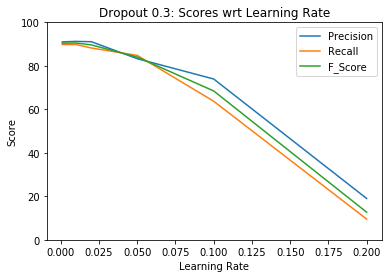

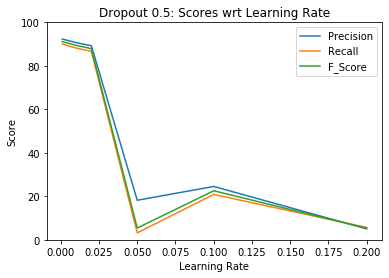

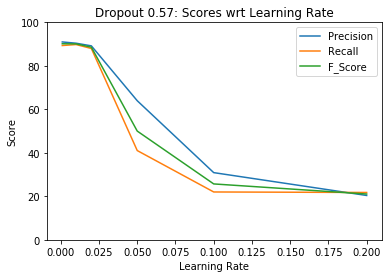

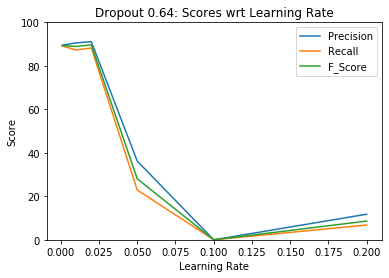

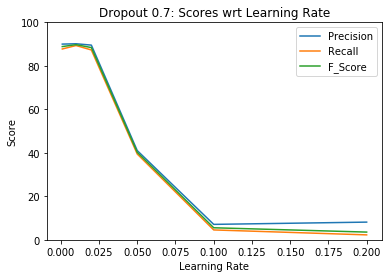

In [ ]:
#no_test

print('Plot columns wrt same dropout, different learning rates')
my_lr = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
my_dps = [0.3, 0.5, 0.57, 0.64, 0.7]

plt.figure(1)
#plt.subplot(511)
plt.ylim([0, 100])
dps3_precision = dps3['Precision'].tolist()
dps3_recall = dps3['Recall'].tolist()
dps3_f = dps3['F_Score'].tolist()
plt.plot(my_lr, dps3_precision, label='Precision')
plt.plot(my_lr, dps3_recall, label='Recall')
plt.plot(my_lr, dps3_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Dropout 0.3: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(2)
#plt.subplot(511)
plt.ylim([0, 100])
dps5_precision = dps5['Precision'].tolist()
dps5_recall = dps5['Recall'].tolist()
dps5_f = dps5['F_Score'].tolist()
plt.plot(my_lr, dps5_precision, label='Precision')
plt.plot(my_lr, dps5_recall, label='Recall')
plt.plot(my_lr, dps5_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Dropout 0.5: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(3)
#plt.subplot(511)
plt.ylim([0, 100])
dps57_precision = dps57['Precision'].tolist()
dps57_recall = dps57['Recall'].tolist()
dps57_f = dps57['F_Score'].tolist()
plt.plot(my_lr, dps57_precision, label='Precision')
plt.plot(my_lr, dps57_recall, label='Recall')
plt.plot(my_lr, dps57_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Dropout 0.57: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(4)
#plt.subplot(511)
plt.ylim([0, 100])
dps64_precision = dps64['Precision'].tolist()
dps64_recall = dps64['Recall'].tolist()
dps64_f = dps64['F_Score'].tolist()
plt.plot(my_lr, dps64_precision, label='Precision')
plt.plot(my_lr, dps64_recall, label='Recall')
plt.plot(my_lr, dps64_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Dropout 0.64: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(5)
#plt.subplot(511)
plt.ylim([0, 100])
dps7_precision = dps7['Precision'].tolist()
dps7_recall = dps7['Recall'].tolist()
dps7_f = dps7['F_Score'].tolist()
plt.plot(my_lr, dps7_precision, label='Precision')
plt.plot(my_lr, dps7_recall, label='Recall')
plt.plot(my_lr, dps7_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Dropout 0.7: Scores wrt Learning Rate')
plt.legend()
plt.show()

It appears as though we can ignore learning rates above 0.03 or so, so let's focus on that

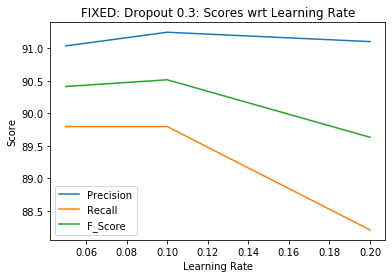

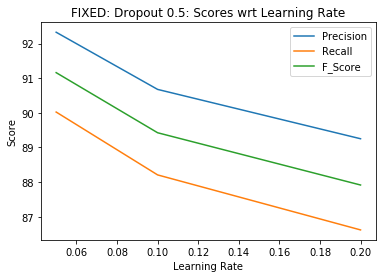

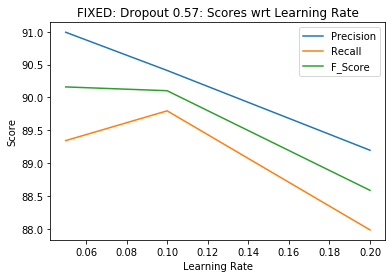

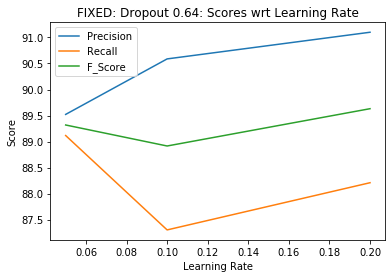

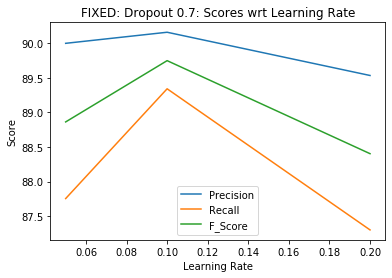

In [ ]:
#no_test

#Selecting trials where the Learning_Rate is greater than some desired value
min_lr = 0.03
my_lr = [i for i in my_lr if i >= min_lr]

dps3f = dps3.loc[dps3['Learning_Rate'] <= min_lr]
dps5f = dps5.loc[dps5['Learning_Rate'] <= min_lr]
dps57f = dps57.loc[dps57['Learning_Rate'] <= min_lr]
dps64f = dps64.loc[dps64['Learning_Rate'] <= min_lr]
dps7f = dps7.loc[dps7['Learning_Rate'] <= min_lr]

#Plotting again
plt.figure(1)
#plt.subplot(511)
dps3f_precision = dps3f['Precision'].tolist()
dps3f_recall = dps3f['Recall'].tolist()
dps3f_f = dps3f['F_Score'].tolist()
plt.plot(my_lr, dps3f_precision, label='Precision')
plt.plot(my_lr, dps3f_recall, label='Recall')
plt.plot(my_lr, dps3f_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('FIXED: Dropout 0.3: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(2)
#plt.subplot(511)
dps5f_precision = dps5f['Precision'].tolist()
dps5f_recall = dps5f['Recall'].tolist()
dps5f_f = dps5f['F_Score'].tolist()
plt.plot(my_lr, dps5f_precision, label='Precision')
plt.plot(my_lr, dps5f_recall, label='Recall')
plt.plot(my_lr, dps5f_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('FIXED: Dropout 0.5: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(3)
#plt.subplot(511)
dps57f_precision = dps57f['Precision'].tolist()
dps57f_recall = dps57f['Recall'].tolist()
dps57f_f = dps57f['F_Score'].tolist()
plt.plot(my_lr, dps57f_precision, label='Precision')
plt.plot(my_lr, dps57f_recall, label='Recall')
plt.plot(my_lr, dps57f_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('FIXED: Dropout 0.57: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(4)
#plt.subplot(511)
dps64f_precision = dps64f['Precision'].tolist()
dps64f_recall = dps64f['Recall'].tolist()
dps64f_f = dps64f['F_Score'].tolist()
plt.plot(my_lr, dps64f_precision, label='Precision')
plt.plot(my_lr, dps64f_recall, label='Recall')
plt.plot(my_lr, dps64f_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('FIXED: Dropout 0.64: Scores wrt Learning Rate')
plt.legend()
plt.show()

plt.figure(5)
#plt.subplot(511)
dps7f_precision = dps7f['Precision'].tolist()
dps7f_recall = dps7f['Recall'].tolist()
dps7f_f = dps7f['F_Score'].tolist()
plt.plot(my_lr, dps7f_precision, label='Precision')
plt.plot(my_lr, dps7f_recall, label='Recall')
plt.plot(my_lr, dps7f_f, label='F_Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('FIXED: Dropout 0.7: Scores wrt Learning Rate')
plt.legend()
plt.show()



Repeating the above with respect to learning rate.  Note that we expect the lower learning rates to have the best scores

Plot columns wrt same learning rates, different dropout


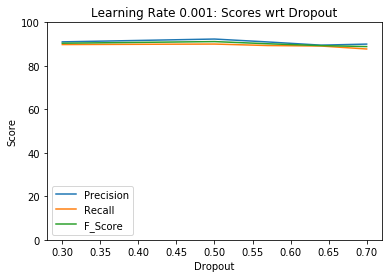

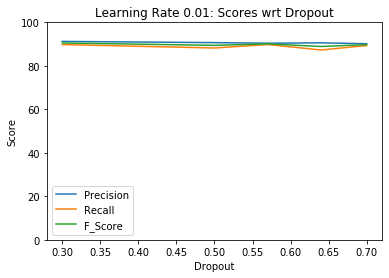

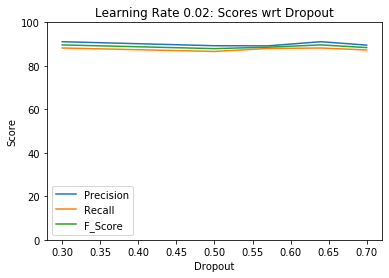

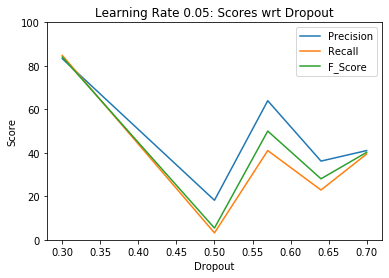

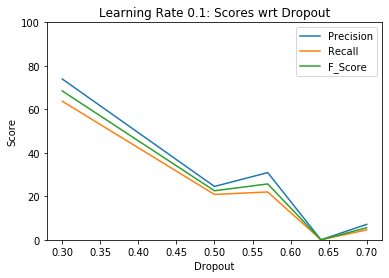

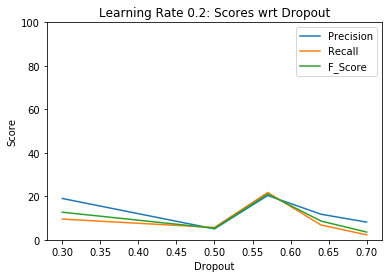

In [ ]:
#no_test

my_lr = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
my_dps = [0.3, 0.5, 0.57, 0.64, 0.7]

print('Plot columns wrt same learning rates, different dropout')
plt.figure(1)
#plt.subplot(511)
plt.ylim([0, 100])
lr001_precision = lr001['Precision'].tolist()
lr001_recall = lr001['Recall'].tolist()
lr001_f = lr001['F_Score'].tolist()
plt.plot(my_dps, lr001_precision, label='Precision')
plt.plot(my_dps, lr001_recall, label='Recall')
plt.plot(my_dps, lr001_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.001: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(2)
#plt.subplot(511)
plt.ylim([0, 100])
lr01_precision = lr01['Precision'].tolist()
lr01_recall = lr01['Recall'].tolist()
lr01_f = lr01['F_Score'].tolist()
plt.plot(my_dps, lr01_precision, label='Precision')
plt.plot(my_dps, lr01_recall, label='Recall')
plt.plot(my_dps, lr01_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.01: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(3)
#plt.subplot(511)
plt.ylim([0, 100])
lr02_precision = lr02['Precision'].tolist()
lr02_recall = lr02['Recall'].tolist()
lr02_f = lr02['F_Score'].tolist()
plt.plot(my_dps, lr02_precision, label='Precision')
plt.plot(my_dps, lr02_recall, label='Recall')
plt.plot(my_dps, lr02_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.02: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(4)
#plt.subplot(511)
plt.ylim([0, 100])
lr05_precision = lr05['Precision'].tolist()
lr05_recall = lr05['Recall'].tolist()
lr05_f = lr05['F_Score'].tolist()
plt.plot(my_dps, lr05_precision, label='Precision')
plt.plot(my_dps, lr05_recall, label='Recall')
plt.plot(my_dps, lr05_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.05: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(5)
#plt.subplot(511)
plt.ylim([0, 100])
lr1_precision = lr1['Precision'].tolist()
lr1_recall = lr1['Recall'].tolist()
lr1_f = lr1['F_Score'].tolist()
plt.plot(my_dps, lr1_precision, label='Precision')
plt.plot(my_dps, lr1_recall, label='Recall')
plt.plot(my_dps, lr1_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.1: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(6)
#plt.subplot(511)
plt.ylim([0, 100])
lr2_precision = lr2['Precision'].tolist()
lr2_recall = lr2['Recall'].tolist()
lr2_f = lr2['F_Score'].tolist()
plt.plot(my_dps, lr2_precision, label='Precision')
plt.plot(my_dps, lr2_recall, label='Recall')
plt.plot(my_dps, lr2_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.2: Scores wrt Dropout')
plt.legend()
plt.show()


Again, let's only focus on the cases with usuable performance

Plot columns wrt same learning rates, different dropout


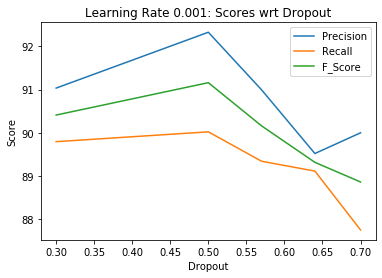

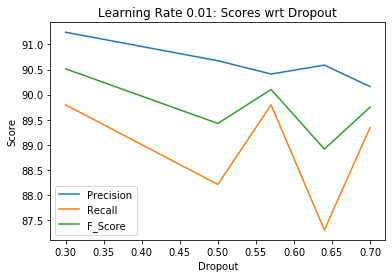

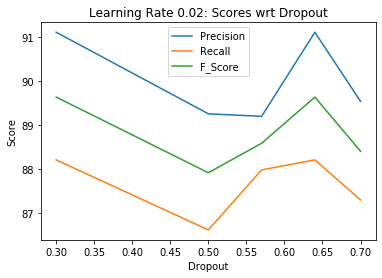

In [ ]:
#no_test

my_lr = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
my_dps = [0.3, 0.5, 0.57, 0.64, 0.7]

print('Plot columns wrt same learning rates, different dropout')
plt.figure(1)
#plt.subplot(511)
lr001_precision = lr001['Precision'].tolist()
lr001_recall = lr001['Recall'].tolist()
lr001_f = lr001['F_Score'].tolist()
plt.plot(my_dps, lr001_precision, label='Precision')
plt.plot(my_dps, lr001_recall, label='Recall')
plt.plot(my_dps, lr001_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.001: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(2)
#plt.subplot(511)
lr01_precision = lr01['Precision'].tolist()
lr01_recall = lr01['Recall'].tolist()
lr01_f = lr01['F_Score'].tolist()
plt.plot(my_dps, lr01_precision, label='Precision')
plt.plot(my_dps, lr01_recall, label='Recall')
plt.plot(my_dps, lr01_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.01: Scores wrt Dropout')
plt.legend()
plt.show()

plt.figure(3)
#plt.subplot(511)
lr02_precision = lr02['Precision'].tolist()
lr02_recall = lr02['Recall'].tolist()
lr02_f = lr02['F_Score'].tolist()
plt.plot(my_dps, lr02_precision, label='Precision')
plt.plot(my_dps, lr02_recall, label='Recall')
plt.plot(my_dps, lr02_f, label='F_Score')
plt.xlabel('Dropout')
plt.ylabel('Score')
plt.title('Learning Rate 0.02: Scores wrt Dropout')
plt.legend()
plt.show()

In [ ]:
#no_test

#This block hasn't been written yet, will do the above but as a callable function
#Note that history_df is wrong, needs to be updated on every run, not just overwriting a new copy...

#load saved model and performance metrics if desired:
#this_model_dir = 'models/42-initial-model/4e0f496_dp0.4_lr0.0003'
#nlp_model = load_model(this_model_dir)
#perf_df = read_csv(this_model_dir + '\perf_df.csv')

#perf_df.set_index('cycle_no', drop=True, inplace=True)
#perf_df.head()

#Plotting
#Columns: cycle_no avg_cycle_loss precission recall f_score dropout learning_rate

#Note that training curves already exist in NB 42:

#scale the losses a bit just to see things together
#perf_df['loss_scaled'] = perf_df['avg_cycle_loss']/10
#perf_df.drop(columns=['avg_cycle_loss']).plot()

In [ ]:
#no_test

from nbdev.export import notebook2script
notebook2script()

Converted 12-ssda-xml-parser.ipynb.
Converted 31-collate-xml-entities-spans.ipynb.
Converted 33-split-data.ipynb.
Converted 41-generic-framework-for-spacy-training.ipynb.
Converted 42-initial-model.ipynb.
Converted 51-data-preprocessing.ipynb.
Converted 52-unstructured-to-markup.ipynb.
Converted 53-markup-to-spatial-historian.ipynb.
Converted 54-utility-functions.ipynb.
Converted 61-prodigy-output-training-demo.ipynb.
Converted 62-full-model-application-demo.ipynb.
Converted 63-pt-model-training.ipynb.
Converted 64-es-model-training.ipynb.
Converted 65-all-annotations-model-training.ipynb.
Converted 66-es-guatemala-model-training.ipynb.
Converted 67-death-and-birth-records-together.ipynb.
Converted 70-exhaustive-training.ipynb.
Converted 71-relationship-builder.ipynb.
Converted 72-full-volume-processor.ipynb.
